# UNSUPERVISED LEARNING  IRIS CLUSTERING

## Packages importation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
#Importation du Dataset des fleurs d'Iris parmis plusieurs datasets

iris = pd.read_csv('IrisClustering.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Statistics Analyse + Ploting Chart

In [2]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [3]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

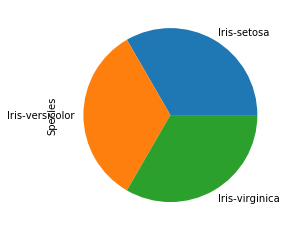

In [4]:
iris['Species'].value_counts().plot.pie()

#We will suppose 3 particular species by Visualizing ['','','']

In [7]:
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

# A/K-Means Clustering

## Clustering Parameters,Methods,Attributs

In [8]:
model = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0 ) 
#Nombre de cluster 5
#Nombre d'execution de l'algorithme <<n_init>> fixé à 10 de base pas besoin d'y touché
#Nombre d'itteration <<max_iter>> de base fixé à 200 ou 300 pas besoin d'y touché
#Strategie d'initialisaton que nous allons utiliser. 

#Par défaut c'est la méthode K-Means++ consiste à placer les centroids sur des points du dataset éloignés les uns
#des autres facilitant la convergence(accélerer la convergence de nos centroids vers les points d'équilibre).
#On peut uniquement utiliser dans notre KMeans le nombre de cluster uniquement les autres hyper paramètres sont 
#définis par défaut

## Preprocessing

In [10]:
#Toutes les valeurs sont presentes donc nous n'avons pa besoin de faire du impute preprocessing

In [11]:
model.fit(X)
#On utilise les memes méthodes d'apprentissage habituelles que lors de l'apprentissage supervisé

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
model.predict(X) 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 0, 4, 3, 0, 0, 3, 2, 3, 0, 3,
       0, 0, 0, 4, 0, 0, 0, 3, 3, 4, 0, 4, 3, 4, 0, 3, 4, 4, 0, 3, 3, 3,
       0, 4, 4, 3, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4])

In [13]:
model.inertia_

46.53558205128205

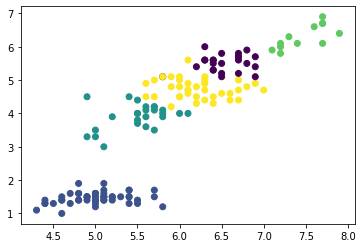

In [14]:
plt.scatter(X.iloc[:,0],X.iloc[:,2], c=model.predict(X))

array([[6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256]])

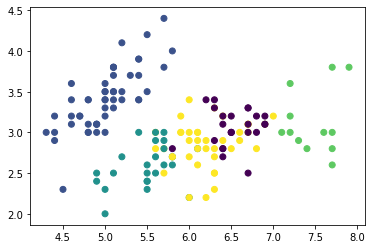

In [15]:
#On peut afficher la position et coordonnees des centroids.
plt.scatter(X['SepalLengthCm'],X['SepalWidthCm'], c=model.predict(X))
model.cluster_centers_

46.56163015873016

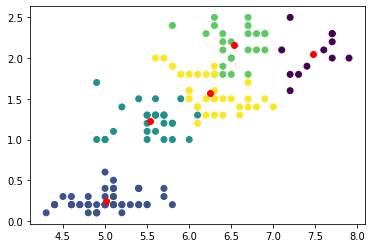

In [17]:
#Calcul de l'inertia: Somme des distances entre les points d'un cluster et le centroid.
model = KMeans(n_clusters = 5)
model.fit(X)
model.predict(X)  
plt.scatter(X.iloc[:,0],X.iloc[:,3], c=model.predict(X)) #Représentation selon la variable Position 0 et Position 3.
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,3], c='r')
model.inertia_ 

## Recherche de meilleures Parametres

In [18]:
#We search all Modifiables Parameters of our Model
model.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [19]:
inertia = []#Creation of a score List
K_range = range(1,20)
for k in K_range:
    model = KMeans(n_clusters = k).fit(X) #entrainement du modèle sur les 20 clusters définit
    inertia.append(model.inertia_)
    

Text(0, 0.5, 'Cout du modele (Inertia)')

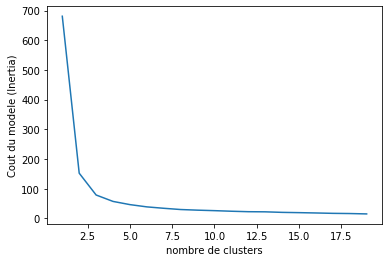

In [20]:
#On va maintenant afficher les clusters en fonction de leur cout
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

In [21]:
model = KMeans(n_clusters = 3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
model.inertia_

78.94084142614602

## PREDICTION OF CLUSTERS FROM OUR MODEL

In [23]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])